<h1 style="text-align: center;">CS584 - Project 2</h1>


In [62]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
class GradientBoostingTree:
    def __init__(self, n_estimators=100, learning_rate=0.1, max_depth=3):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.trees = []
        self.gammas = []

    def fit_tree(self, X, r, depth=0):

        if depth == self.max_depth or len(X) == 0:
            return np.mean(r)
        
        best_split = None
        min_error =  float('inf')

        for f in range(X.shape[1]):
            for t in np.unique(X[:, f]):
                left = X[:, f] <= t
                right = X[:, f] > t
                l_mean = np.mean(r[left])
                r_mean = np.mean(r[right])
                error = np.sum((r[left] - l_mean) ** 2) + np.sum((r[right] - r_mean) ** 2)
                if error < min_error:
                    best_split = (f, t, l_mean, r_mean)
                    min_error = error

        if not best_split:
            return np.mean(r)
        
        f, t, l_ret, r_ret = best_split

        return {"f": f,
                "t": t,
                "left": self.fit_tree(X[X[:, f] <= t], r[X[:, f] <= t], depth + 1),
                "right": self.fit_tree(X[X[:, f] > t], r[X[:, f] > t], depth + 1)
                }

    def predict_tree(self, tree, X):
        if not isinstance(tree, dict):
            return np.full(len(X), tree)
        
        mask = X[:, tree["f"]] <= tree["t"]

        preds = np.zeros(len(X))

        preds[mask] = self.predict_tree(tree["left"], X[mask])
        preds[~mask] = self.predict_tree(tree["right"], X[~mask])

        return preds

    def fit(self, X, y):
        self.initial_pred = np.mean(y)
        pred = np.full_like(y, self.initial_pred)

        for i in range(self.n_estimators):
            r = y - pred

            tree = self.fit_tree(X, r)
            self.trees.append(tree)

            preds = self.predict_tree(tree, X)

            gamma = np.mean(r / preds) if np.any(preds) else 0
            self.gammas.append(gamma)

            pred += self.learning_rate * gamma * preds

    def predict(self, X):
        pred = np.full(len(X), self.initial_pred)
        
        for tree, gamma in zip(self.trees, self.gammas):
            pred += self.learning_rate * gamma * self.predict_tree(tree, X)
        return pred


In [ ]:
np.random.seed(42)
X = np.random.rand(100, 1) * 10
y = 2 * X.squeeze() + 1 + np.random.normal(0, 1, X.shape[0])  # y = 2x + 1 + c

In [ ]:
model = GradientBoostingTree(n_estimators=20, learning_rate=0.1, max_depth=2)
model.fit(X, y)

X_test = np.linspace(0, 10, 100).reshape(-1, 1)
y_pred = model.predict(X_test)

c:\Python311\Lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Python311\Lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


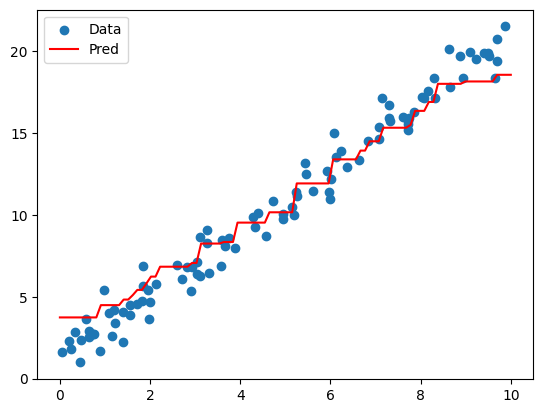

In [ ]:
plt.scatter(X, y, label="Data")
plt.plot(X_test, y_pred, label="Pred", color="red")
plt.legend()
plt.show()

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [68]:
np.random.seed(42)
X = np.random.rand(1000, 1) * 10
y = np.sin(X.squeeze()) + 0.5 * X.squeeze()**2 - 3 * X.squeeze() + np.random.normal(0, 1, X.shape[0])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [69]:
model = GradientBoostingTree(n_estimators=100, learning_rate=0.1, max_depth=3)

model.fit(X_train, y_train)

y_pred_test = model.predict(X_test)

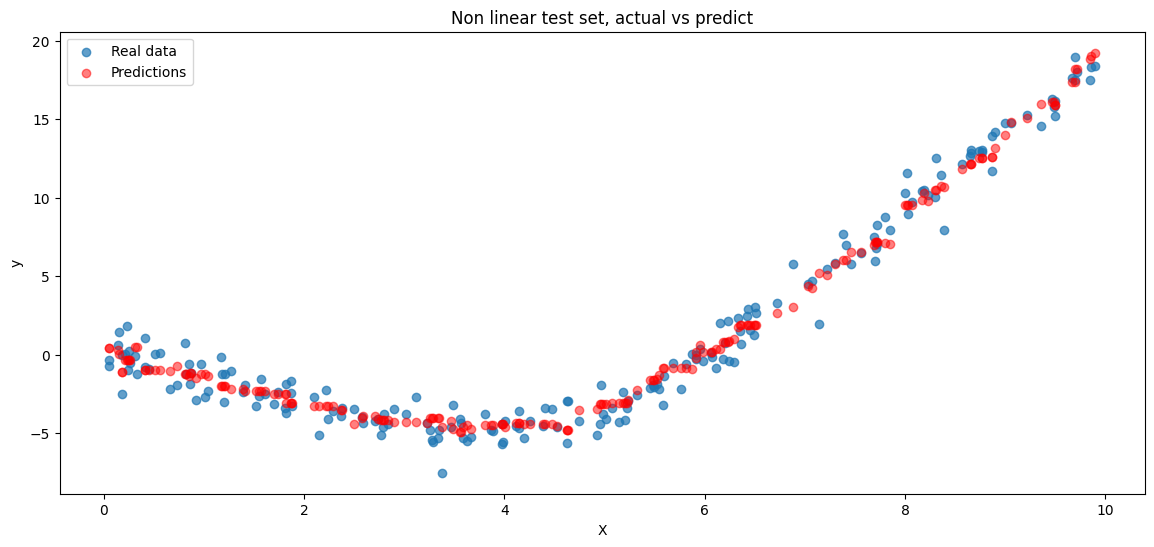

In [70]:
plt.figure(figsize=(14, 6))
plt.scatter(X_test, y_test, label="Real data", alpha=0.7)
plt.scatter(X_test, y_pred_test, label="Predictions", color="red", alpha=0.5)
plt.title("Non linear test set, actual vs predict")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

In [71]:
mse_test = mean_squared_error(y_test, y_pred_test)
print("y_test MSE : ", mse_test)

y_test MSE :  0.9976960046970182
